# Residiualplott

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms # regresjonen
import statsmodels.formula.api as smf # formel for regresjonen

## Funksjon som returnerer verdier fra regresjonslikningen

In [2]:
def tilpasset_verdi(fA, fC):      # returnerer verdien fra regresjonslikningen, her med A, C og AC som signifikante
    return 776.1 - 50.8*fA + 153.1 * fC - 76.8 * fA * fC

# Må tilpasses egne verdier. Disse er hentet fra eksempelet i temavideoene

## Henter inn opprinnelige data og legger til regresjonsverdiene

In [3]:
# Leser inn effekttabell fra fil

filnavn = 'dybde.csv'                           # Skriv inn eget filnavn
df = pd.read_csv(filnavn,sep = ';')              # Leser inn i dataframe. Separator endres ved behov
k = 3                                  # Antall faktorer
n = 16                                 # Antall målinger
df["modell"] = tilpasset_verdi(df["A"],df["C"])   # modell inneholder estimerte verdier ut fra regresjonslikningen
df

,A,B,C,Y1,Y2,modell
0,-1,-1,-1,550,604,597.0
1,1,-1,-1,669,650,649.0
2,-1,1,-1,633,601,597.0
3,1,1,-1,642,635,649.0
4,-1,-1,1,1037,1052,1056.8
5,1,-1,1,749,868,801.6
6,-1,1,1,1075,1063,1056.8
7,1,1,1,729,860,801.6


## Finner residualene

In [4]:
residualer = np.zeros(16) 

res1 = df['Y1'] - df['modell']
res2 = df['Y2'] - df['modell']  
res = np.append(res1,res2)

## Plotter residualer i målt rekkefølge

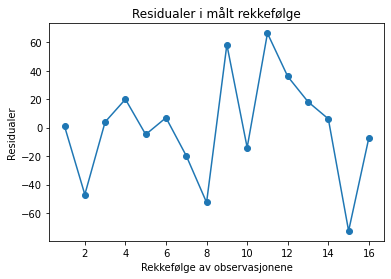

In [5]:
orden = [2,4,13,16,7,8,13,15,6,1,3,10,5,11,14,9]    # Angir målt rekkefølge. Sett inn egne verdier

df_residualer = pd.DataFrame({'Indeks' : orden, 'residualer' : res})

plt.title('Residualer i målt rekkefølge')
x = np.linspace(1,n,n)
df_ordnet = df_residualer.sort_values(by=['Indeks'])

plt.plot(x,df_ordnet['residualer'],'o-')
plt.xlabel('Rekkefølge av observasjonene')
plt.ylabel('Residualer')
plt.savefig('Residualplott-1.png')


## Histogram

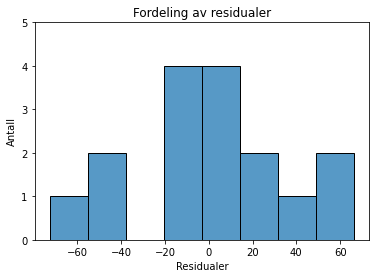

In [6]:
sns.histplot(df_residualer['residualer'], bins = 8)
plt.title('Fordeling av residualer')
plt.ylabel('Antall')
plt.xlabel('Residualer')
plt.ylim(0,5)
plt.savefig('hist.png')


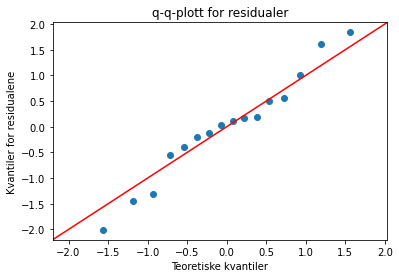

In [7]:

sms.qqplot(df_residualer['residualer'],line = '45',fit = True )
plt.title('q-q-plott for residualer')
plt.xlabel('Teoretiske kvantiler')
plt.ylabel('Kvantiler for residualene')
plt.savefig('qq.png')
plt.show()

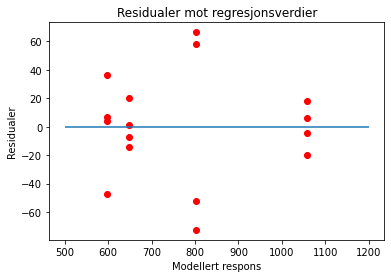

In [8]:
yhatt = np.append(df['modell'],df['modell'])

plt.plot(yhatt,res,'ro')
plt.hlines(0,500,1200)
plt.title('Residualer mot regresjonsverdier')
plt.xlabel('Modellert respons')
plt.ylabel('Residualer')
plt.savefig('Versus_fits')